# COGS 118A- Project Checkpoint

# Names

Hopefully your team is at least this good. Obviously you should replace these with your names.

- Maxwell Jung
- Carter Nielsen
- Yescenia Alvarez

# Abstract 
Our goal for this project is to examine historical stock and homicide reports data from 2000 to 2014 to see if we can create a predictor from stock data to homicides. the stock data is stock data from the current 30 members of the DOW Jones members, dating back to when they joined or 2000. The Homicide data goes from 1980 to 2014, so we will use the overlap from 2000 to 2014. With this data we will choose and fit a regression model and try ommitting certain years or months for testing. Success will be determined by examining the accuracy of our predictor on the test data.

# Background

The background of this area of investigation is deep, as there are many papers and articles about the possible and very likely link between economy and crime, especially in terms of relating poverty and increasing crime rates <a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Specifically looking at historical data, income and unemployment rate have been found to have a very large impact on crime rate increasing or decreasing, and in this project we hope to see if different measures can be found to have a simialr correlation at the very least.

# Background

The background of this area of investigation is deep, as there are many papers and articles about the possible and very likely link between economy and crime, especially in terms of relating poverty and increasing crime rates <a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Specifically looking at historical data, income and unemployment rate have been found to have a very large impact on crime rate increasing or decreasing, and in this project we hope to see if different measures can be found to have a simialr correlation at the very least.

# Data
Dataset 1: [Dow Stock Data 2000-2020](https://www.kaggle.com/datasets/deeplytics/dow-stock-data)
- 20 years of top 30 companies stock prices, containing date, price, high, low and other information.
- Each observation contains the daily stock info about a company.
- The most important variables for us will be the date and price, as they will be used as the independent variable for our predictor. they will be represented as a date string and as a float value for the price.
- The only thing of note for cleaning is that we will be only using the data from 2000-2014 so that it will match up with our second dataset.

Dataset 2: [Homicide reports](https://www.kaggle.com/datasets/murderaccountability/homicide-reports)
- contains 34 years of homicide reports from cities in the U.S. it contains data about city, agency reported to, type of crime, information about the date, victim, perpetrator among other things.
- Each data point is one reported crime.
- The critical variable for this dataset will be the date.
- For cleaning, we will have to transform the data to be in a time series, so that we can count the amount of crime per day or month as opposed to having a list of each crime.

# Proposed Solution

For this project, we propose some sort of regression model to predict crime rate from the stock prices, we are currently unsure of which model we will use but we will most likely attempt a few different methods to see which performs the best.

# Evaluation Metrics
We plan on blocking the data we have from the years 2000-2014 into training and testing blocks, and the metric of evaluation will be the model's performance on the testing data.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [1]:
#Data Wrangling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


#homicide_data data
homicide_data = pd.read_csv('deaths_data.csv')

dow_data = pd.read_csv('dow_data.csv')

C:\Users\maxgj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#dow_data = dow_data[dow_data['stock'] == 'DOW']
dow_data['date']= pd.to_datetime(dow_data['date']).dt.date

dow_data = dow_data[dow_data['date'] < pd.to_datetime('2015-01-01')]



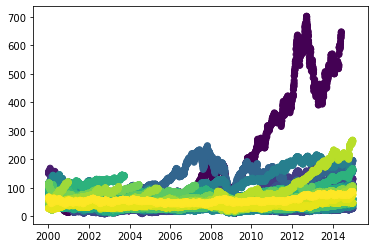

In [3]:
def dfScatter(df, xcol, ycol, catcol):
    fig, ax = plt.subplots()
    categories = np.unique(df[catcol])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))  

    df["Color"] = df[catcol].apply(lambda x: colordict[x])
    ax.scatter(df[xcol], df[ycol], c=df.Color)


dfScatter(dow_data, 'date', 'close', 'stock')

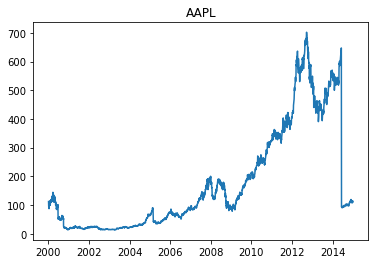

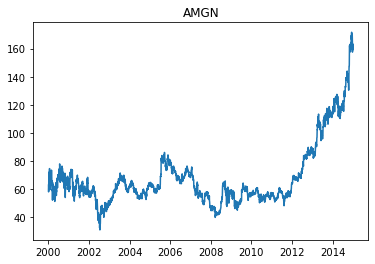

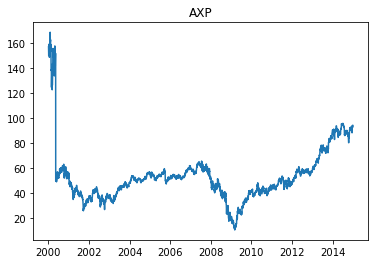

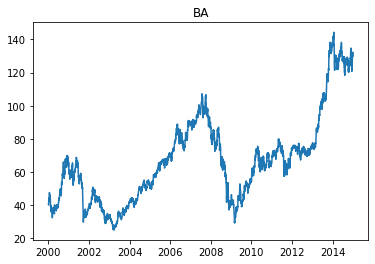

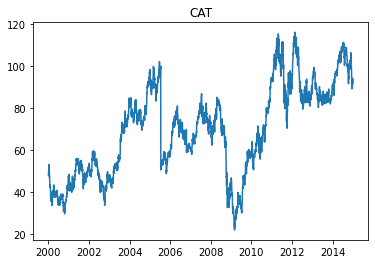

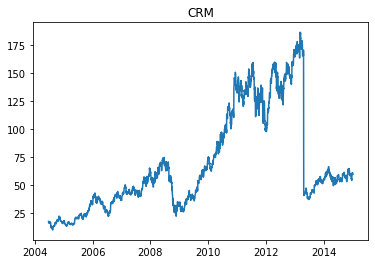

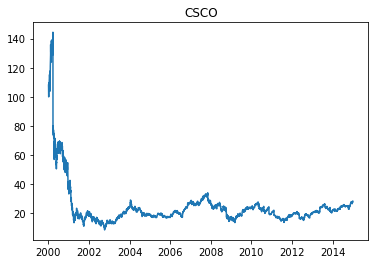

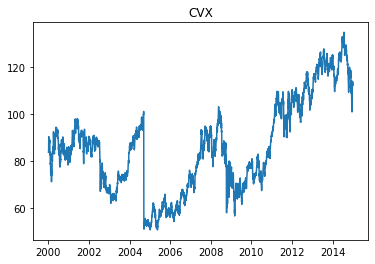

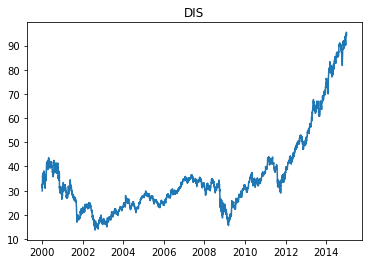

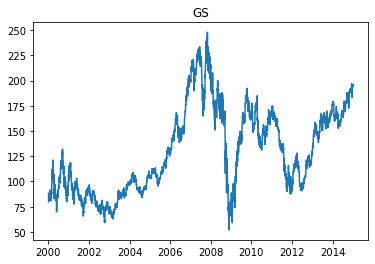

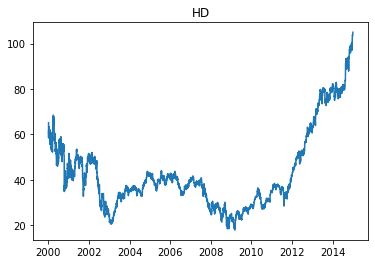

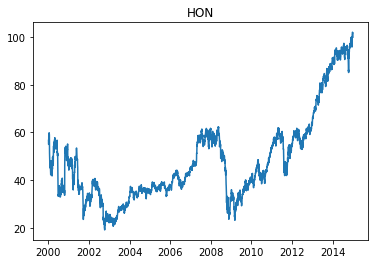

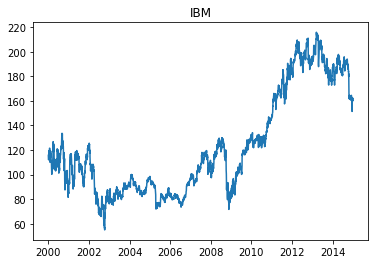

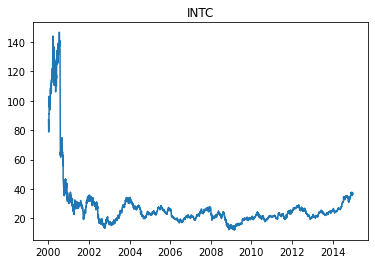

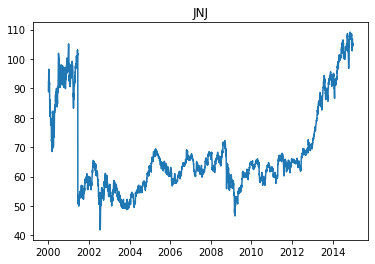

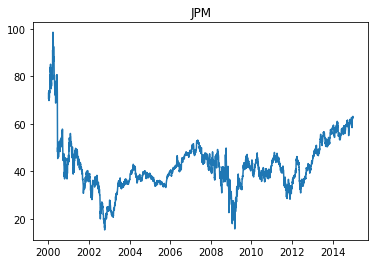

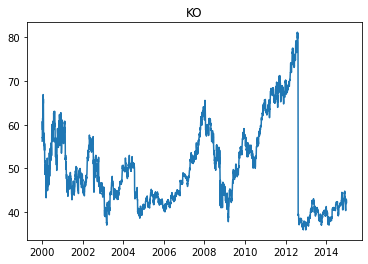

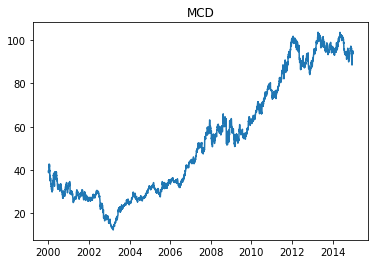

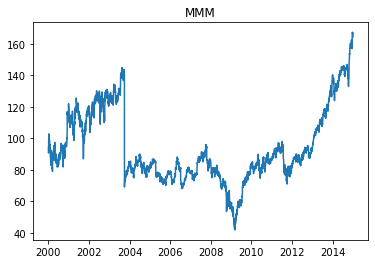

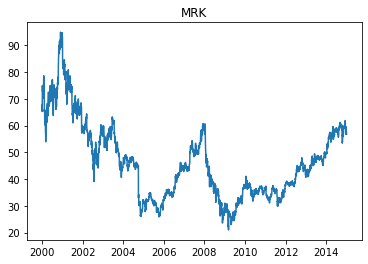

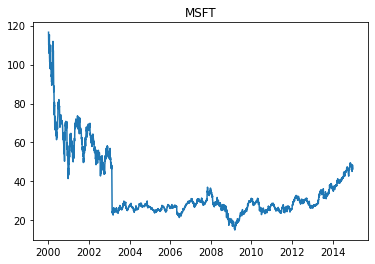

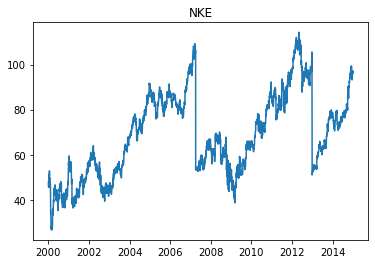

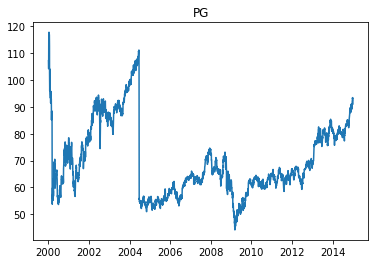

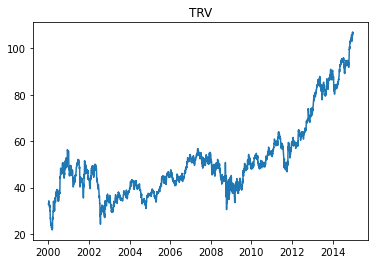

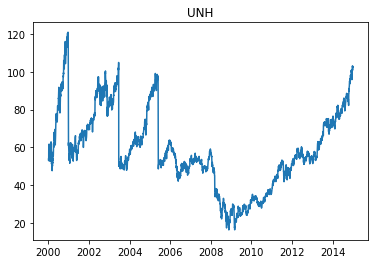

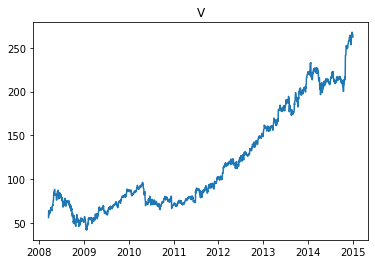

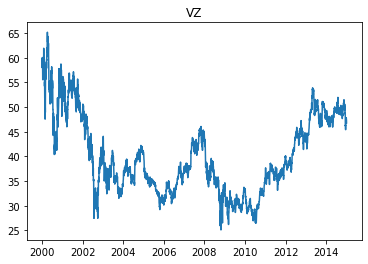

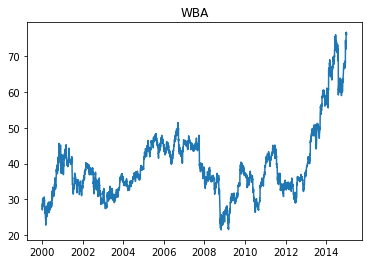

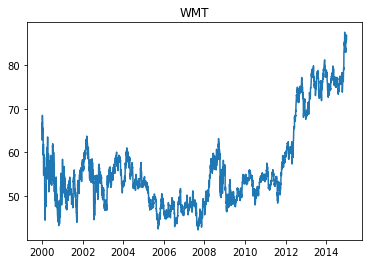

In [4]:
for stock in dow_data['stock'].unique():
    stock_plot = dow_data[dow_data['stock'] == stock]
    plt.plot(stock_plot['date'], stock_plot['close'])
    plt.title(stock)
    plt.show()

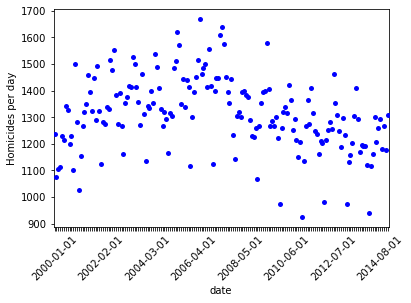

In [5]:
month_map = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

homicide_data['Month_num'] = homicide_data['Month'].map(month_map)
homicide_data['date'] = homicide_data.apply(lambda row: (str(row['Year']) + '-' + str(row['Month_num']) + '-1'), axis = 1)
homicide_data['date']= pd.to_datetime(homicide_data['date'])


homicide_date_counts = pd.DataFrame(homicide_data['date'].value_counts().rename_axis('date').reset_index(name='homicides'))

homicide_date_counts['date'] = homicide_date_counts['date'].dt.date


homicide_date_counts = homicide_date_counts.sort_values(['date']).reset_index()

ax = sns.swarmplot(x= 'date', y= 'homicides', palette=['blue'], data=homicide_date_counts)
plt.ylabel("Homicides per day")
plt.xticks(rotation = 45)
every_nth = 25
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

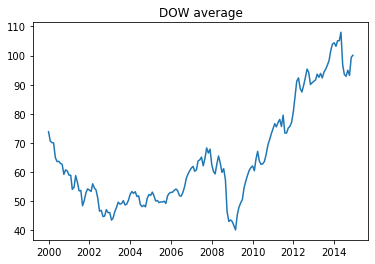

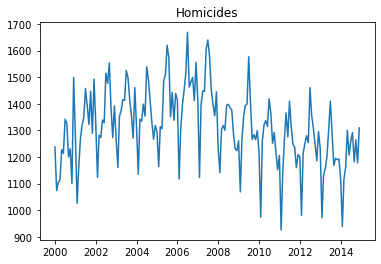

In [6]:
#creating data for average dow price
dow_data['month'] = pd.DatetimeIndex(dow_data['date']).month
dow_data['year'] = pd.DatetimeIndex(dow_data['date']).year
dow_grouped = pd.DataFrame(dow_data.groupby(['year', 'month'])['close'].mean()).reset_index()
dow_grouped['date'] = dow_grouped.apply(lambda row: (str(int(row['year'])) + '-' + str(int(row['month'])) + '-1'), axis = 1)
dow_grouped['date']= pd.to_datetime(dow_grouped['date'])

plt.plot(dow_grouped['date'], dow_grouped['close'])

plt.title('DOW average')
plt.show()

plt.title('Homicides')
plt.plot(homicide_date_counts['date'], homicide_date_counts['homicides'])
plt.show()




In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X = np.array(dow_grouped['close']).reshape(-1, 1)
y = np.array(homicide_date_counts['homicides']).reshape(-1, 1)

reg = LinearRegression().fit(X, y)


print(reg.score(X, y))

model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])

model = model.fit(X, y)
model.named_steps['linear'].coef_
print(model.score(X, y))


0.18158627296664365
0.18161392535021026


# Ethics & Privacy

The ethics and privacy of this project will be covered throuroughly as all potentially personal information especially from the homicide data is anonymized sufficiently, and not made public.

# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* *Do our best to be respectful to each other, but also give helpful feedback so we can create the best version of our project*
* *Put in equal work as best as we can*

# Project Timeline Proposal

In general we will attempt to meet a few days to a week before each deadline to divy up responsibilites and be on the same page for each checkpoint.

# Footnotes
<a name="lorenznote">^</a>1.Article denoting previous investigations done into crime and economy [Dynamic linkages between poverty, inequality, crime](https://journalofeconomicstructures.springeropen.com/articles/10.1186/s40008-020-00220-6).
